# Análisis estadístico utilizando la metodología CRISP-DM para datos de flujo de calor en la Cuenca Panamá


#### Giovanny Alejandro Cuervo Londoño C.C 1010216862
#### Laura Camila Perdomo Rodríguez C.C 1117837347

importamos los paquetes necesarios

In [75]:
%matplotlib inline
! pip install -U scikit-learn
! pip install --upgrade kneed
import pandas as pd
import numpy as np
import statsmodels.api as sm
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import statsmodels.formula.api as smf
from sklearn.model_selection import train_test_split
! pip install geostatspy
import geostatspy.GSLIB as GSLIB          # GSLIB utilies, visualization and wrapper
import geostatspy.geostats as geostats    # GSLIB methods convert to Python 

Requirement already up-to-date: scikit-learn in /usr/local/lib/python3.6/dist-packages (0.23.2)
Requirement already up-to-date: kneed in /usr/local/lib/python3.6/dist-packages (0.7.0)


In [76]:
print(f'Pandas: {pd.__version__}')
print(f'NumPy: {np.__version__}')
print(f'Statsmodels.api: {sm.__version__}')

Pandas: 1.1.5
NumPy: 1.18.5
Statsmodels.api: 0.10.2


# 1. Entendimiento del Negocio

### Objetivos del negocio
---
En la coyuntura actual, la problemática ambiental impacta casi todas las disciplinas profesionales, pues es nuestro entorno natural el que recibe y expresa todas las consecuencias medioambientales que son resultado de las actividades antrópicas. Los cuerpos oceánicos son los más afectados por el cambio climático, por lo que día a día se toman millones de datos en todo el mundo para hacer un seguimiento riguroso y así observar los cambios que sufren estas grandes extensiones de agua, que a su vez cambian las dinámicas bióticas y abióticas de los elementos asociados al sistema oceánico.

Los Océanos son el hábitat del fitoplancton, microalgas que absorben gran cantidad de **$CO_2$** y razón por la cual capturan gran cantidad de gases de efecto invernadero que aumentan la temperatura la atmósfera y el Océano, sin embargo, para cuantificar el **balance térmico** de los Océanos es importante tener en cuenta que también hay un input de flujo de calor $(mW/m^2)$ al sistema oceánico, debido a la energía interna de la Tierra liberada a través de la corteza por procesos volcánicos en el fondo marino. 

Este flujo de calor es la cantidad de calor que pasa a través de un área, estos valores pueden ser indicativos del aporte calórico interno de la Tierra hacia los Océanos, el flujo de calor interno esta relacionado con el decaimiento radiactivo de elementos localizados en el núcleo de la Tierra como: Thorio, Uranio y Potasio. Este es trasmitido a través de la Litosfera por conducción hacia la superficie terrestre y por convección en la interfase corteza-océano. El estudio del balance térmico para el sistema océano permite un mayor entendimiento de los procesos internos que repercuten las diferentes esferas del sistema terrestre.

El entendimiento del balance térmico terrestre es relevante para proyectar estudios de evolución tectónica y cuencas oceánicas los cuales repercuten diferentes aspectos como: los eventos sísmicos, maduración de hidrocarburos, magnetismo cortical y circulación hidrotermal.

Adicionalmente, el $70%$ de la energía liberada por la litosfera es captada por los océanos, según **Pollack, H. N, et al.(1993)** la litosfera oceánica cenozoica ubicada cerca a las dorsales meso-oceánicas representa sólo el 1/3 de la superficie terrestre pero transmiten al Océano la mitad del flujo de calor global liberado por la litosfera.

Para el análisis de los datos se utilizó la metodología CRISP-DM (Cross-Industry Standard Process for Data Mining) sugerida por el curso.

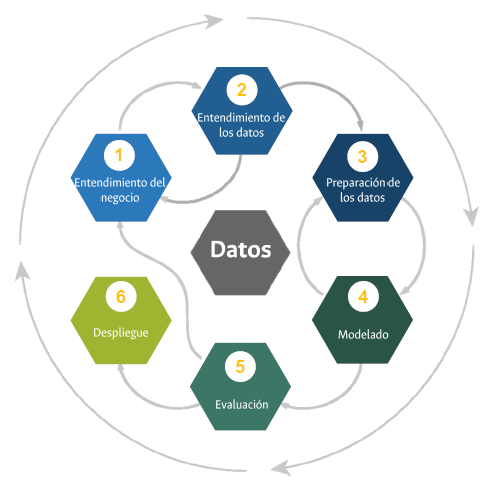<img src="attachment:crisp.png" style="max-width:100%">

### Metas del proyecto
---
1. Con este proyecto se espera realizar un análisis estadístico de dos conjuntos de datos de flujo de calor en la Cuenca Panamá tomados de la base de datos libres **GeoMapp**, con el objetivo principal de utilizar las herramientas que nos ofrece las diferentes librerías de Python para comprender los datos y concluir si los  datos tienen una relación con los puntos geográficos en los que fueron tomados. 

2. Determinar si existe una relación entre la edad de la corteza oceánica y el flujo de calor superficial según las etapas térmicas definidas por **Pollack, H. N, et al.(1993).**

# 2. Entendimiento de Datos

### Adquisición e integración de Datos
---
Definimos la ruta de los data sets consultadas el **22/09/2020**

https://www.ihfc-iugg.org/products/global-heat-flow-database

https://agupubs.onlinelibrary.wiley.com/doi/abs/10.1029/93RG01249

Se descagaron los datos comprendidos por un polígono con coordenadas: 7.998877 Tope, -76.603526 Derecha, -2,766262 Base, -102,882063 Izquierda



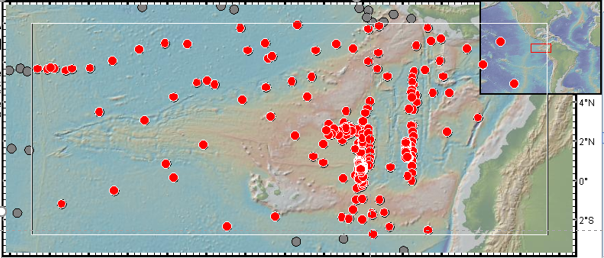<img src="attachment:poligonozona.png" style="max-width:100%">

##### Cargamos los data set como DataFrame

In [77]:
df_DB_IHFC = pd.read_csv('HeatFlowIHFC_Panama.txt', sep = ';')
df_Pollack = pd.read_csv('Oceanic_Heat_Flow_(Pollack_et_al_1993).csv')

### Análisis exploratorio de Datos
---
Se desplego un resumen de los datos de los dos DataFrame trabajados para familiarizarnos con los mismos y con la función **df.head()** se pudo visualizar las diferentes columnas y así poder seleccionar las de interés para el proyecto aplicado.

In [78]:
df_DB_IHFC.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1220 entries, 0 to 1219
Data columns (total 29 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   FID         1220 non-null   int64  
 1   Object_ID   1220 non-null   float64
 2   Latitude    1220 non-null   float64
 3   Longitude   1220 non-null   float64
 4   Site_Name   1220 non-null   object 
 5   Data_Numbe  1220 non-null   float64
 6   Codes       1220 non-null   object 
 7   Elevation   1220 non-null   float64
 8   minD        1220 non-null   float64
 9   maxD        1220 non-null   float64
 10  No__Temps   1220 non-null   object 
 11  Gradient    1220 non-null   float64
 12  No__Cond_   1220 non-null   float64
 13  Conductivi  1220 non-null   float64
 14  No_Heat_Pr  1220 non-null   object 
 15  Heat_Prod_  1220 non-null   object 
 16  Heat_Flow   1220 non-null   float64
 17  No__sites   1220 non-null   float64
 18  Year_of_Pu  1220 non-null   object 
 19  Reference   1220 non-null  

In [79]:
df_Pollack.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 820 entries, 0 to 819
Data columns (total 18 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Data Numbe  820 non-null    int64  
 1   Codes       820 non-null    object 
 2   Site Name   820 non-null    object 
 3   Lat         820 non-null    float64
 4   Long        820 non-null    float64
 5   Elevation   778 non-null    float64
 6   Min. Depth  0 non-null      float64
 7   Max Depth   672 non-null    float64
 8   No. Temper  655 non-null    float64
 9   Temp. Grad  294 non-null    float64
 10  No. Conduc  41 non-null     float64
 11  Conductivi  820 non-null    float64
 12  No. Heat P  0 non-null      float64
 13  Heat Produ  117 non-null    float64
 14  Heat Flow   820 non-null    float64
 15  No. Sites   425 non-null    float64
 16  Reference   820 non-null    object 
 17  Web link    820 non-null    object 
dtypes: float64(13), int64(1), object(4)
memory usage: 115.4+ KB


In [80]:
df_DB_IHFC.head()


,FID,Object_ID,Latitude,Longitude,Site_Name,Data_Numbe,Codes,Elevation,minD,maxD,No__Temps,Gradient,No__Cond_,Conductivi,No_Heat_Pr,Heat_Prod_,Heat_Flow,No__sites,Year_of_Pu,Reference,Comments,F21,F22,F23,F24,F25,F26,ben,europe
0,0,826.0,6.6167,-88.4083,V18-140,917.0,,-3247.0,4.0,12.0,2,191.0,0.0,0.67,,,128.0,1.0,1965,Langseth_etal1965,Langseth_etal1965,,,,,,,0,0
1,1,827.0,6.7250,-86.5000,V18-141,918.0,,-2892.0,10.0,17.0,2,56.0,4.0,0.76,,,43.0,1.0,1965,Langseth_etal1965,Langseth_etal1965,,,,,,,0,0
2,2,828.0,6.0667,-85.7167,V18-142,919.0,,-1819.0,4.0,12.0,3,153.0,0.0,0.82,,,126.0,1.0,1965,Langseth_etal1965,Langseth_etal1965,,,,,,,0,0
3,3,829.0,5.6917,-85.2667,V18-143,920.0,,-1840.0,4.0,12.0,3,141.0,0.0,0.90,,,127.0,1.0,1965,Langseth_etal1965,Langseth_etal1965,,,,,,,0,0
4,4,830.0,5.3000,-84.7500,V18-144,921.0,,-3005.0,7.0,16.0,3,140.0,0.0,0.74,,,105.0,1.0,1965,Langseth_etal1965,Langseth_etal1965,,,,,,,0,0


In [81]:
df_Pollack.head()

,Data Numbe,Codes,Site Name,Lat,Long,Elevation,Min. Depth,Max Depth,No. Temper,Temp. Grad,No. Conduc,Conductivi,No. Heat P,Heat Produ,Heat Flow,No. Sites,Reference,Web link
0,239,PONSRB,RIS-32B,5.683333,-102.600,-3130.0,NaN,NaN,NaN,276.0,NaN,0.74,NaN,NaN,203.0,1.0,VU63,http://www.heatflow.und.edu/
1,240,PONNRA,RIS-33,5.650000,-102.100,-3175.0,NaN,NaN,NaN,424.0,NaN,0.73,NaN,NaN,311.0,1.0,VU63,http://www.heatflow.und.edu/
2,241,PONSRB,RIS-34B,5.700000,-101.717,-3440.0,NaN,NaN,NaN,36.0,NaN,0.77,NaN,NaN,28.1,1.0,VU63,http://www.heatflow.und.edu/
3,242,PONNRA,RIS-35,5.600000,-101.150,-3250.0,NaN,NaN,NaN,92.0,NaN,0.81,NaN,NaN,74.5,1.0,VU63,http://www.heatflow.und.edu/
4,243,PONSRB,RIS-36,5.683333,-100.833,-3405.0,NaN,NaN,NaN,64.0,NaN,0.81,NaN,NaN,52.3,1.0,VU63,http://www.heatflow.und.edu/


# 3. Preparación de Datos
---

### Selección de características
---
De los DataFrame subidos se eligieron 5 variables o columnas para realizar el procesamiento de datos, las cuales se concatenaron con el fin de construir dos nuevos DataFrame llamados **df_DB_IHFC** y **df_Pollack**, para cada uno de los Sets de datos descargados respectivamente.

In [82]:
df_DB_IHFC = pd.concat([df_DB_IHFC['Site_Name'], df_DB_IHFC['Longitude'], df_DB_IHFC['Latitude'],df_DB_IHFC['Elevation'], df_DB_IHFC['Heat_Flow']], axis= 1)
df_DB_IHFC 


,Site_Name,Longitude,Latitude,Elevation,Heat_Flow
0,V18-140,-88.4083,6.6167,-3247.0,128.0
1,V18-141,-86.5000,6.7250,-2892.0,43.0
2,V18-142,-85.7167,6.0667,-1819.0,126.0
3,V18-143,-85.2667,5.6917,-1840.0,127.0
4,V18-144,-84.7500,5.3000,-3005.0,105.0
...,...,...,...,...,...
1215,TT198-27,-83.7610,1.1790,-3405.0,0.0
1216,TT198-19,-83.7580,1.1850,-3387.0,0.0
1217,TT198-21,-83.7600,1.1850,-3379.0,0.0
1218,TT198-5,-83.7110,1.2253,-3450.0,0.0


In [83]:
df_Pollack = pd.concat([df_Pollack['Site Name'], df_Pollack['Long'], df_Pollack['Lat'],df_Pollack['Elevation'], df_Pollack['Heat Flow']], axis= 1)
df_Pollack

,Site Name,Long,Lat,Elevation,Heat Flow
0,RIS-32B,-102.6000,5.683333,-3130.0,203.0
1,RIS-33,-102.1000,5.650000,-3175.0,311.0
2,RIS-34B,-101.7170,5.700000,-3440.0,28.1
3,RIS-35,-101.1500,5.600000,-3250.0,74.5
4,RIS-36,-100.8330,5.683333,-3405.0,52.3
...,...,...,...,...,...
815,C21-19E,-83.8178,1.417222,-3489.0,160.0
816,C21-19F,-83.8183,1.419167,-3450.0,180.0
817,C21-19G,-83.8192,1.435278,-3388.0,178.0
818,C21-TG6,-83.7356,1.184722,-3375.0,200.0


### Procesamiento y transformación 
---
Se realizó un cambio de nombres de las columnas o variables seleccionadas en cada DataFrame con el objetivo de estandarizar los nombre de las respectivas variables.

In [84]:
df_DB_IHFC.rename(columns= {'Site_Name':'Codigo',
                            'Longitude':'lon',
                            'Latitude':'lat', 
                            'Elevation':'Profundidad', 
                            'Heat_Flow':'Flujo_calor'}, inplace= True)

df_Pollack.rename(columns= {'Site Name':'Codigo',
                            'Long':'lon',
                            'Lat':'lat',
                            'Elevation':'Profundidad', 
                            'Heat Flow':'Flujo_calor'}, inplace= True)


### Limpieza de datos
---
Mediante las diferentes funciones propuestas en el curso se realizó la limpieza de datos nulos e iguales a cero eliminándolos, dado que estos datos no eran indispensables y se podía dificultar el tratamiento y la concatenación de los DataFrame **df_DB_IHFC** y **df_Pollack**.

In [85]:
df_Pollack.isna().sum()


Codigo          0
lon             0
lat             0
Profundidad    42
Flujo_calor     0
dtype: int64

In [86]:
df_DB_IHFC.isna().sum()

Codigo         0
lon            0
lat            0
Profundidad    0
Flujo_calor    0
dtype: int64

##### Eliminamos los valores nulos

In [87]:
df_Pollack = df_Pollack.dropna()

##### Eliminamos los valores iguales a cero

In [88]:
df_Pollack = df_Pollack[(df_Pollack != 0).all(1)]
df_DB_IHFC = df_DB_IHFC[(df_DB_IHFC != 0).all(1)]

##### Fusionamos los DataFrame
---
Se unirse los DataFrame de la siguiente manera: **df_DB_IHFC $+$ df_Pollack $=$ df_Flujo_calor**, para un manejo apropiado y sencillo de los datos.

In [89]:
df_Flujo_calor = pd.concat([df_Pollack, df_DB_IHFC], ignore_index= True)
df_Flujo_calor.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1780 entries, 0 to 1779
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Codigo       1780 non-null   object 
 1   lon          1780 non-null   float64
 2   lat          1780 non-null   float64
 3   Profundidad  1780 non-null   float64
 4   Flujo_calor  1780 non-null   float64
dtypes: float64(4), object(1)
memory usage: 69.7+ KB


##### Buscamos datos duplicados
---
Adicionalmente, se encontraron muestras con códigos duplicados, los cuales fueron promediados en un solo dato. Por otro lado, se eliminaron algunas filas con datos inconsistentes respecto a las variables de profundidad y flujo de calor. Estos pasos se hicieron con el fin de ajustar detalles que puedan influir negativamente en la interpretación de los datos del DataFrame final.

In [90]:
df_Flujo_calor.duplicated(subset=['Codigo']).sum()


709

In [91]:
1780-709

1071

In [92]:
#La muestra RIS-41 esta dos veces
df_Flujo_calor[df_Flujo_calor['Codigo'] == 'RIS-41']

,Codigo,lon,lat,Profundidad,Flujo_calor
9,RIS-41,-96.1,6.966667,-3785.0,3.4
1779,RIS-41,-96.1,6.966700,-3785.0,3.0


##### Promediamos las muestras con codigos iguales

In [93]:
df_Flujo_calor = df_Flujo_calor.groupby('Codigo').mean().reset_index()

#volvemos a revisar si hay muestras con códigos repetidos
df_Flujo_calor.duplicated(subset=['Codigo']).sum() 

0

##### Se observa que los primeros 4 valores tienen valores inconsistentes de profundidad por lo que se procede a eliminarlos

In [94]:
df_Flujo_calor = df_Flujo_calor.drop([0, 1, 2, 3],axis=0)
df_Flujo_calor.reset_index(drop= True, inplace= True)

In [95]:
df_Flujo_calor.head()

,Codigo,lon,lat,Profundidad,Flujo_calor
0,27HF23,-86.86670,3.537222,-2136.0,65.85
1,28HF24,-86.99115,2.950989,-2870.0,267.00
2,29HF25,-86.90680,2.720539,-2690.0,211.00
3,31HF27,-87.01960,2.150989,-2824.0,187.00
4,32HF28,-87.05290,2.034306,-2503.0,234.00


In [96]:
df_Flujo_calor.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1067 entries, 0 to 1066
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Codigo       1067 non-null   object 
 1   lon          1067 non-null   float64
 2   lat          1067 non-null   float64
 3   Profundidad  1067 non-null   float64
 4   Flujo_calor  1067 non-null   float64
dtypes: float64(4), object(1)
memory usage: 41.8+ KB


##### Se corrobora que las profundidades son todas menores a 0, comparando el conteo con el valor total de los datos que son 1067

In [97]:
df_Flujo_calor[df_Flujo_calor['Profundidad'] < 0].count()


Codigo         1067
lon            1067
lat            1067
Profundidad    1067
Flujo_calor    1067
dtype: int64

##### Identifico las filas con flujos de calor negativos, lo cual es totalmente inconsistente 

In [98]:
df_Flujo_calor[df_Flujo_calor['Flujo_calor'] < 0]
#se observa que hay 2 valores inconsistentes de flujo de calor (filas 49 y 51)

,Codigo,lon,lat,Profundidad,Flujo_calor
49,AL734.6,-86.0933,0.5733,-2734.0,-16.0
51,AL734.8,-86.1000,0.5750,-2734.0,-125.0


##### Se eliminan los calores negativos de los flujos de calor. 

In [99]:
df_Flujo_calor = df_Flujo_calor.drop([49, 51], axis=0)

# Geoestaditica (Sesgo Espacial)
---
Se observa un sesgo espacial en los datos de flujo de calor

### Especificamos el área de estudio
---
El rango espacial del área de estudio son: 7.998877 Tope, -76.603526 Derecha, -2.766262 Base, -102.882063 Izquierda

In [100]:
ymin = -2.766262; ymax = 7.998877               # rango de lat values
xmin = -102.882063; xmax = -76.603526             # rango de lon values
calmin = 1.85; calmax = 8272;           # rango de Flujo Calor values
cmap = plt.cm.inferno                   # color map

/usr/local/lib/python3.6/dist-packages/geostatspy/GSLIB.py:270: MatplotlibDeprecationWarning:

The 'verts' parameter of scatter() is deprecated since Matplotlib 3.2 and will be removed two minor releases later.  If any parameter follows 'verts', they should be pass as keyword, not positionally.



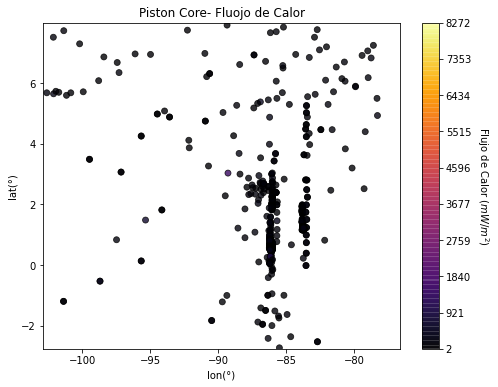

In [101]:
GSLIB.locmap(df_Flujo_calor,'lon','lat','Flujo_calor',xmin,xmax,ymin,ymax,calmin,calmax,'Piston Core- Fluojo de Calor','lon(°)','lat(°)','Flujo de Calor ($mW/m^2$)',cmap,'locmap_Flujo Calor');

### Declustering (metodo)

Discretizando los datos en cuadros formando una red se dan pesos a cada dato de flujo de calor según la cantidad de puntos en el cuadro; mayor peso si pocos datos caen en el cuedro y menro peso si muchos datos caen en los cuadros

In [102]:
wts, cell_sizes, dmeans = geostats.declus(df_Flujo_calor,'lon','lat','Flujo_calor',iminmax = 1, noff= 10, ncell=100,cmin=10,cmax=2000)
#df_Flujo_calor['Wts'] = wts                            # add weights to the sample data DataFrame
df_Flujo_calor.insert(5, 'Pesos', wts)                  #colacamos la columna pesos en la posición [5]
Flux_x_wts= df_Flujo_calor['Flujo_calor']*df_Flujo_calor['Pesos']
df_Flujo_calor.insert(6, 'Flux_x_wts', Flux_x_wts)   
df_Flujo_calor.head()                                  # preview to check the sample data DataFrame

There are 1065 data with:
   mean of      259.89187793427226 
   min and max  1.85 and 8272.0
   standard dev 388.88364466330313 


,Codigo,lon,lat,Profundidad,Flujo_calor,Pesos,Flux_x_wts
0,27HF23,-86.86670,3.537222,-2136.0,65.85,0.942231,62.045937
1,28HF24,-86.99115,2.950989,-2870.0,267.00,0.792270,211.536033
2,29HF25,-86.90680,2.720539,-2690.0,211.00,0.792270,167.168925
3,31HF27,-87.01960,2.150989,-2824.0,187.00,0.660685,123.548114
4,32HF28,-87.05290,2.034306,-2503.0,234.00,0.660685,154.600314


In [103]:
df_Flujo_calor.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
lon,1065.0,-85.745156,2.842457,-102.600000,-86.135300,-86.066700,-83.763400,-78.266700
lat,1065.0,1.416774,1.610464,-2.733317,0.617622,0.839150,1.257500,7.916683
Profundidad,1065.0,-2953.794366,389.633827,-3955.000000,-3390.000000,-2768.000000,-2713.000000,-617.000000
Flujo_calor,1065.0,259.891878,389.066348,1.850000,105.000000,195.000000,295.000000,8272.000000
Pesos,1065.0,1.000000,2.689668,0.209196,0.209196,0.257636,0.312549,31.898402
Flux_x_wts,1065.0,147.780547,437.505369,0.476627,40.374764,59.688533,97.275985,6017.129536


#### Ploteamos espacialmente los pesos

/usr/local/lib/python3.6/dist-packages/geostatspy/GSLIB.py:270: MatplotlibDeprecationWarning:

The 'verts' parameter of scatter() is deprecated since Matplotlib 3.2 and will be removed two minor releases later.  If any parameter follows 'verts', they should be pass as keyword, not positionally.



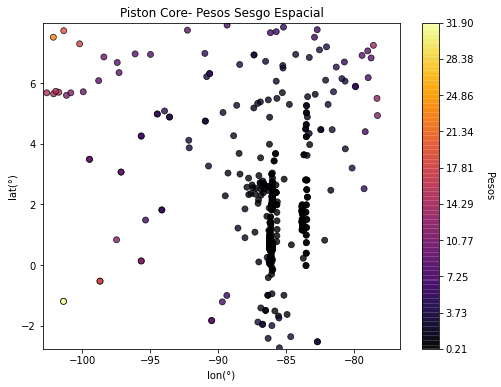

In [104]:
GSLIB.locmap(df_Flujo_calor,'lon','lat','Pesos',xmin,xmax,ymin,ymax,0.209196,31.898402,'Piston Core- Pesos Sesgo Espacial','lon(°)','lat(°)','Pesos',cmap,'locmap_Pesos');

### Naive mean vs. declustered mean

Se procede a comparar la media ingenua (naive mean) con la media corregida (declustered mean)

/usr/local/lib/python3.6/dist-packages/geostatspy/GSLIB.py:336: MatplotlibDeprecationWarning:

The 'verts' parameter of scatter() is deprecated since Matplotlib 3.2 and will be removed two minor releases later.  If any parameter follows 'verts', they should be pass as keyword, not positionally.

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:18: UserWarning:

Attempted to set non-positive bottom ylim on a log-scaled axis.
Invalid limit will be ignored.

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:24: UserWarning:

Attempted to set non-positive bottom ylim on a log-scaled axis.
Invalid limit will be ignored.

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:30: UserWarning:

Attempted to set non-positive bottom ylim on a log-scaled axis.
Invalid limit will be ignored.



#########################
Flujo de Calor naive mean: 259.892.
Flujo de Calor declustered mean: 147.781.
Correction of: 43.14%.

Summary statistics of the declsutering weights:
DescribeResult(nobs=1065, minmax=(0.20919566720372668, 31.898401805166483), mean=1.0000000000000024, variance=7.234315374273233, skewness=5.944860556709587, kurtosis=46.762765938177004)
#########################


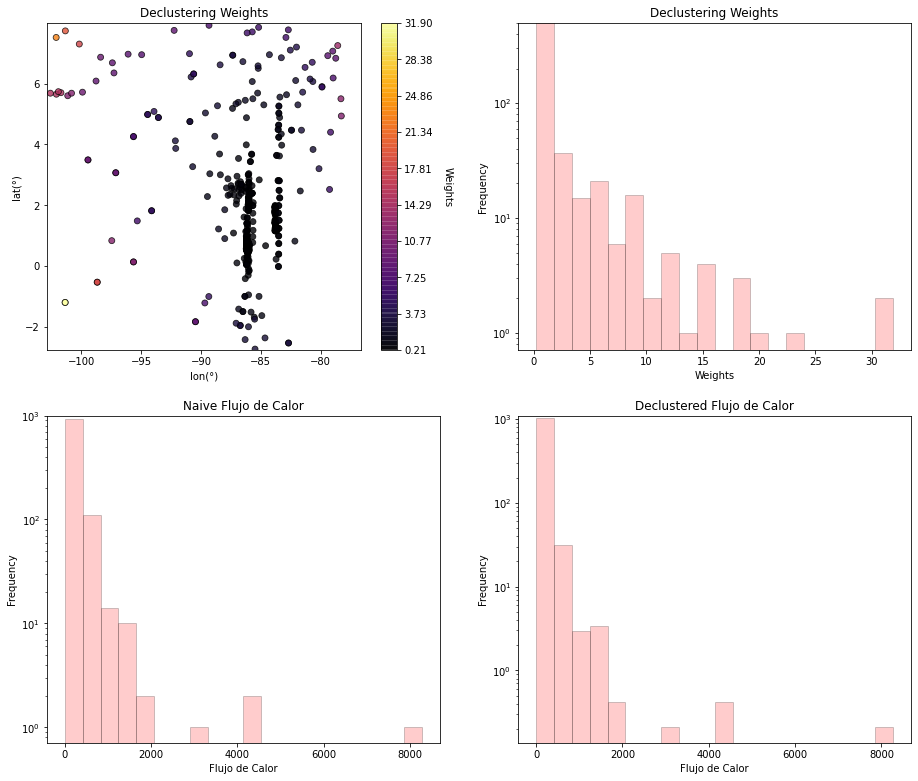

In [105]:
#Fijamos los rango para las viarables a graficar
wts_min= df_Flujo_calor['Pesos'].min()
wts_max= df_Flujo_calor['Pesos'].max()

flux_cal_min= df_Flujo_calor['Flujo_calor'].min()
flux_cal_max= df_Flujo_calor['Flujo_calor'].max()

#graficamos los 4 gráficos
plt.subplot(221)
GSLIB.locmap_st(df_Flujo_calor,'lon','lat','Pesos',
                xmin,xmax,ymin,ymax,wts_min,wts_max,
                'Declustering Weights','lon(°)','lat(°)','Weights',cmap)

plt.subplot(222)
GSLIB.hist_st(df_Flujo_calor['Pesos'],wts_min,wts_max,
              log=True,cumul=False,bins=20,weights=None,
              xlabel="Weights",title="Declustering Weights")
plt.ylim(0.0,500)

plt.subplot(223)
GSLIB.hist_st(df_Flujo_calor['Flujo_calor'],flux_cal_min,flux_cal_max,
              log=True,cumul=False,bins=20,weights=None,
              xlabel="Flujo de Calor",title="Naive Flujo de Calor")
plt.ylim(0.0,1000)

plt.subplot(224)
GSLIB.hist_st(df_Flujo_calor['Flujo_calor'],flux_cal_min,flux_cal_max,
              log=True,cumul=False,bins=20,weights=df_Flujo_calor['Pesos'],
              xlabel="Flujo de Calor",title="Declustered Flujo de Calor")
plt.ylim(0.0,1100)

#generamos el informe
FluxCal_mean = np.average(df_Flujo_calor['Flujo_calor'].values)
FluxCal_dmean = np.average(df_Flujo_calor['Flujo_calor'].values,weights=df_Flujo_calor['Pesos'].values)
print('#########################')
print('Flujo de Calor naive mean: ' + str(round(FluxCal_mean,3))+'.')
print('Flujo de Calor declustered mean: ' + str(round(FluxCal_dmean,3))+'.')
cor = (FluxCal_mean-FluxCal_dmean)/FluxCal_mean
print('Correction of: ' + str(round(cor,4)*100) +'%.')

print('\nSummary statistics of the declsutering weights:')
print(stats.describe(wts))
print('#########################')
plt.subplots_adjust(left=0.0, bottom=0.0, right=2.0, top=2.5, wspace=0.2, hspace=0.2)
plt.show()

### Tamaño de celda vs. mejor media declus

In [106]:
dic_declus = {'cell_sizes': cell_sizes, 'declus_means': dmeans}
df_declus = pd.DataFrame(data=dic_declus)

df_declus

,cell_sizes,declus_means
0,0.0,259.891878
1,10.0,147.780547
2,29.9,198.333571
3,49.8,225.585556
4,69.7,239.114157
...,...,...
97,1920.4,259.891878
98,1940.3,259.891878
99,1960.2,259.891878
100,1980.1,259.891878


In [107]:
min_declus_mean= df_declus['declus_means'].min()
best_declus= df_declus[df_declus['declus_means'] == min_declus_mean]
best_declus

,cell_sizes,declus_means
1,10.0,147.780547


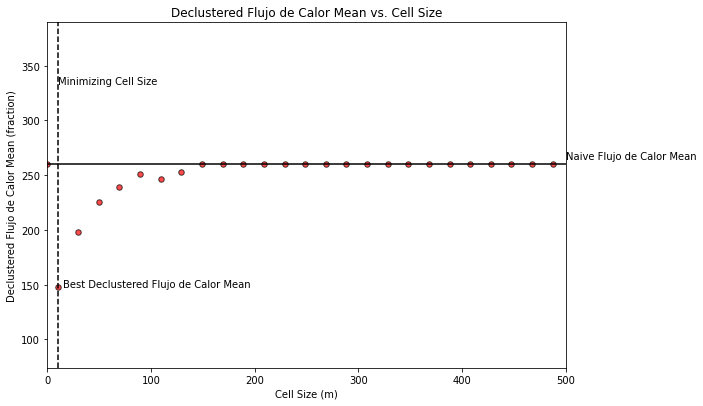

In [108]:
best_cell= best_declus.iat[0,0]
best_dmean= best_declus.iat[0,1]
cell_min= df_declus['cell_sizes'].min()
cell_max= df_declus['cell_sizes'].max()

dmean_min= df_declus['declus_means'].min()
dmean_max= df_declus['declus_means'].max()

plt.subplot(111)
plt.scatter(cell_sizes,dmeans, s=30, alpha = 0.7, edgecolors = "black", facecolors = 'red')
plt.xlabel('Cell Size (m)')
plt.ylabel('Declustered Flujo de Calor Mean (fraction)')
plt.title('Declustered Flujo de Calor Mean vs. Cell Size')
plt.plot([0,2000],[FluxCal_mean,FluxCal_mean],color = 'black')
plt.plot([best_cell,best_cell],[(dmean_min-(dmean_min/2)),(dmean_max+(dmean_max/2))],color = 'black',linestyle='dashed')
plt.text((cell_max-(cell_max/2))*0.5, (FluxCal_mean+5), r'Naive Flujo de Calor Mean')
plt.text(best_cell+5, best_dmean, r'Best Declustered Flujo de Calor Mean')
plt.text(best_cell, FluxCal_mean+(best_dmean*0.5), r'Minimizing Cell Size')
plt.ylim((dmean_min-(dmean_min/2)),(dmean_max+(dmean_max/2)))
plt.xlim(0,(cell_max-(cell_max/2+cell_max/4)))
plt.subplots_adjust(left=0.0, bottom=0.0, right=1.2, top=1.2, wspace=0.2, hspace=0.2)
plt.show()

# Normalización y Outliers
---


### Usando Z.score

Transformando los datos a una distribución normal con std = 0 y una media de 0
Todo dato que al transfomarse sea igual o mayor a: 
Es decir que se salgan del rango entre 3 y -3

In [109]:
#Utilizamos solo las variables numéricas
#num_cols=[df_Flujo_calor['lon'], df_Flujo_calor['lat'], df_Flujo_calor['Profundidad'], df_Flujo_calor['Flujo_calor']]
num_cols= [df_Flujo_calor.select_dtypes(include=np.number)]
zscore = pd.concat(num_cols, axis= 1)

In [110]:
# apply the z-score method in Pandas using the .mean() and .std() methods
def z_score(df):
  # copy the dataframe
  df_std = df.copy()
  # apply the z-score method
  for column in df_std.columns:
    df_std[column] = (df_std[column] - df_std[column].mean()) / df_std[column].std()
  return df_std
# call the z_score function
df_zscore = z_score(zscore)
df_zscore

,lon,lat,Profundidad,Flujo_calor,Pesos,Flux_x_wts
0,-0.394569,1.316669,2.098879,-0.498737,-0.021478,-0.195962
1,-0.438351,0.952654,0.215059,0.018270,-0.077233,0.145725
2,-0.408676,0.809558,0.677031,-0.125665,-0.077233,0.044316
3,-0.448360,0.455902,0.333119,-0.187351,-0.126155,-0.055388
4,-0.460075,0.383449,1.156969,-0.066549,-0.126155,0.015588
...,...,...,...,...,...,...
1062,-1.239014,1.003577,2.902198,3.187395,0.201074,4.944971
1063,-2.241668,1.521441,0.184261,-0.578030,0.817670,-0.081842
1064,-4.059110,3.063232,-1.735490,-0.223334,2.864768,3.104492
1065,-4.452080,3.384257,-1.591765,-0.590881,3.147596,0.311308


#### graficamos los datos para identificar outliers o valores mayores fuera de 3 y -3

In [111]:
df_zscore.describe()

,lon,lat,Profundidad,Flujo_calor,Pesos,Flux_x_wts
count,1.065000e+03,1.065000e+03,1.065000e+03,1.065000e+03,1.065000e+03,1.065000e+03
mean,-1.709306e-14,7.835151e-16,-1.811801e-16,-4.675446e-17,-1.556189e-15,-2.047397e-16
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-5.929675e+00,-2.576953e+00,-2.569607e+00,-6.632336e-01,-2.940156e-01,-3.366905e-01
25%,-1.372559e-01,-4.962247e-01,-1.119527e+00,-3.981117e-01,-2.940156e-01,-2.454959e-01
50%,-1.131218e-01,-3.586694e-01,4.768435e-01,-1.667887e-01,-2.760058e-01,-2.013507e-01
75%,6.971983e-01,-9.889962e-02,6.180017e-01,9.023685e-02,-2.555895e-01,-1.154376e-01
max,2.630983e+00,4.036047e+00,5.997411e+00,2.059317e+01,1.148781e+01,1.341549e+01


Text(0.5, 0, 'Flujo de Calor')

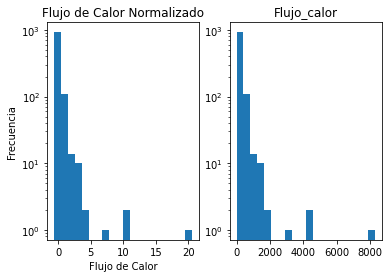

In [112]:
fig, axes = plt.subplots(nrows=1, ncols=2)
ax0, ax1 = axes
ax0.hist(df_zscore['Flujo_calor'], bins=20, log=True)

ax1.hist(df_Flujo_calor['Flujo_calor'], bins=20, log=True)

ax0.set_title('Flujo de Calor Normalizado')
ax1.set_title('Flujo_calor');
ax0.set_ylabel('Frecuencia')
ax0.set_xlabel('Flujo de Calor')


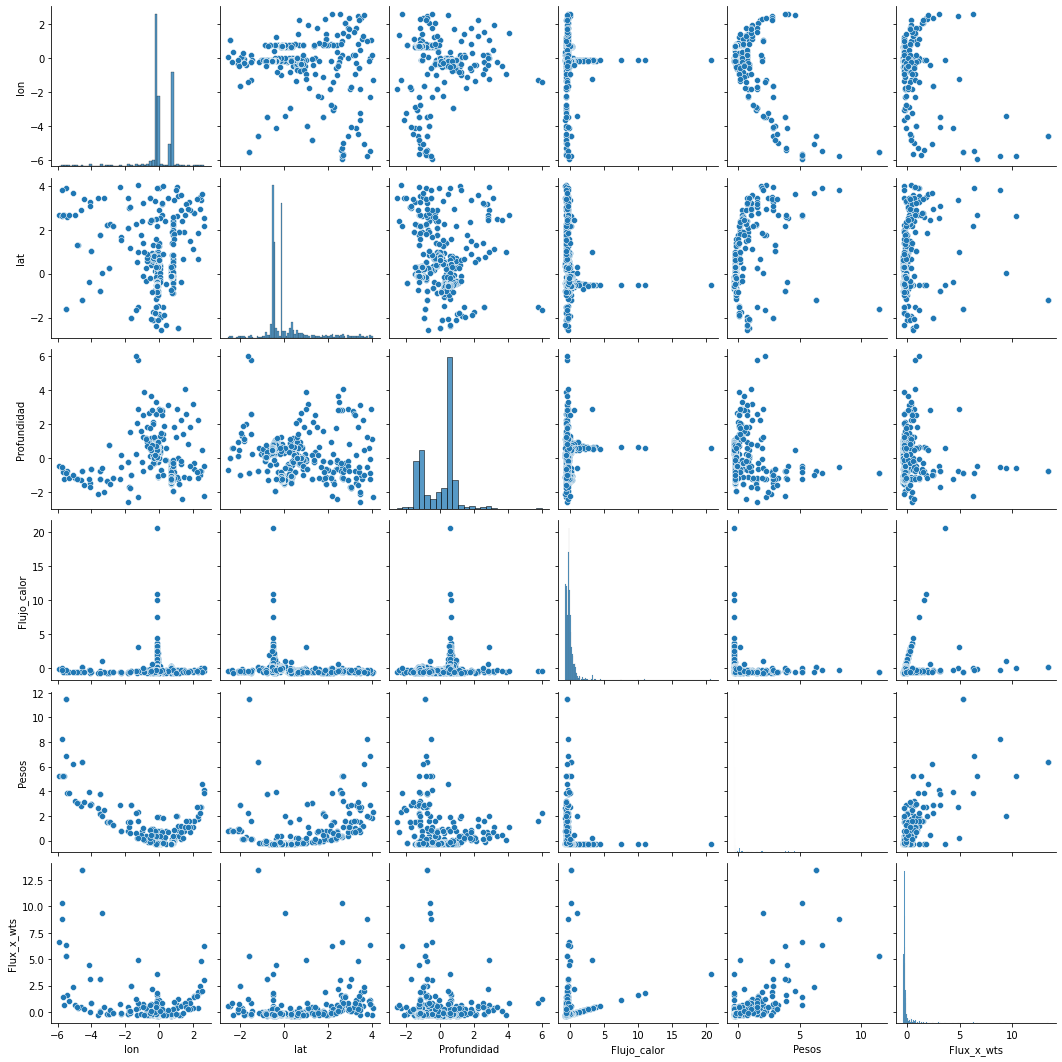

In [113]:
sns.pairplot(df_zscore);

#### Buscamos y cuantificamos los outliers sólo de flujo de calor

In [114]:
from scipy import stats
#aquí transformamos los datos con z-score y los vemos con valor absoluto
z = np.abs(stats.zscore(df_zscore['Flujo_calor']))
#definimos un umbral o límite
threshold = 3
#es decir muestra valores mayores a 3 en el dataFrame transformado z
#print(np.where(z > 3))
filas = np.where(z > threshold)
Outliers_Zscore=[]
#filas, columna son dos arreglos que contienen las filas y columnas o las coordenadas de cada
#Los outliers normalizados son: **Outliers_Zscore**
for i in zip(filas):
  Outliers_Zscore.append(z[i])

#Estos serían los Outliers del DataFrame sin normalizar: **Outliers_Flux_Cal**
Outliers_Flux_Cal=[]
for i in zip(filas):
  Outliers_Flux_Cal.append(df_Flujo_calor['Flujo_calor'].iloc[i])
  

Outliers_Flux_Cal = pd.DataFrame(Outliers_Flux_Cal).transpose()

Outliers_Flux_Cal 

,Flujo_calor
18,1536.0
19,1653.0
24,4153.0
31,3181.0
34,1725.0
44,8272.0
47,1976.0
50,4521.0
399,1549.0
465,1549.0


In [115]:
Outliers_Flux_Cal.size

13

Por lo tanto se tinene 13 datos atípicos en la variable de flujo de calor.

#### Procedemos a eliminarlos

In [116]:
#hacemos copias de los dataframe
df_Flujo_calor_0 = df_Flujo_calor.copy()

#Eliminamos outliers
df_zscore_0 = df_Flujo_calor_0.drop(index= Outliers_Flux_Cal.index)

In [117]:
print(f'Datos antes (con outliers): {df_Flujo_calor.shape} \nDatos despues (sin outliers):{df_zscore_0.shape} \n{df_Flujo_calor.shape[0] - df_zscore_0.shape[0]} filas fueron eliminadas')

Datos antes (con outliers): (1065, 7) 
Datos despues (sin outliers):(1052, 7) 
13 filas fueron eliminadas


Text(0.5, 0, 'Flujo de Calor')

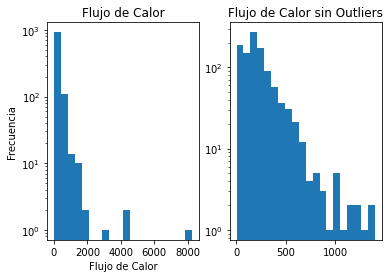

In [118]:
fig, axes = plt.subplots(nrows=1, ncols=2)
ax0, ax1 = axes
ax0.hist(df_Flujo_calor['Flujo_calor'], bins=20, log=True)

ax1.hist(df_zscore_0['Flujo_calor'], bins=20, log=True)

ax0.set_title('Flujo de Calor')
ax1.set_title('Flujo de Calor sin Outliers');
ax0.set_ylabel('Frecuencia')
ax0.set_xlabel('Flujo de Calor')

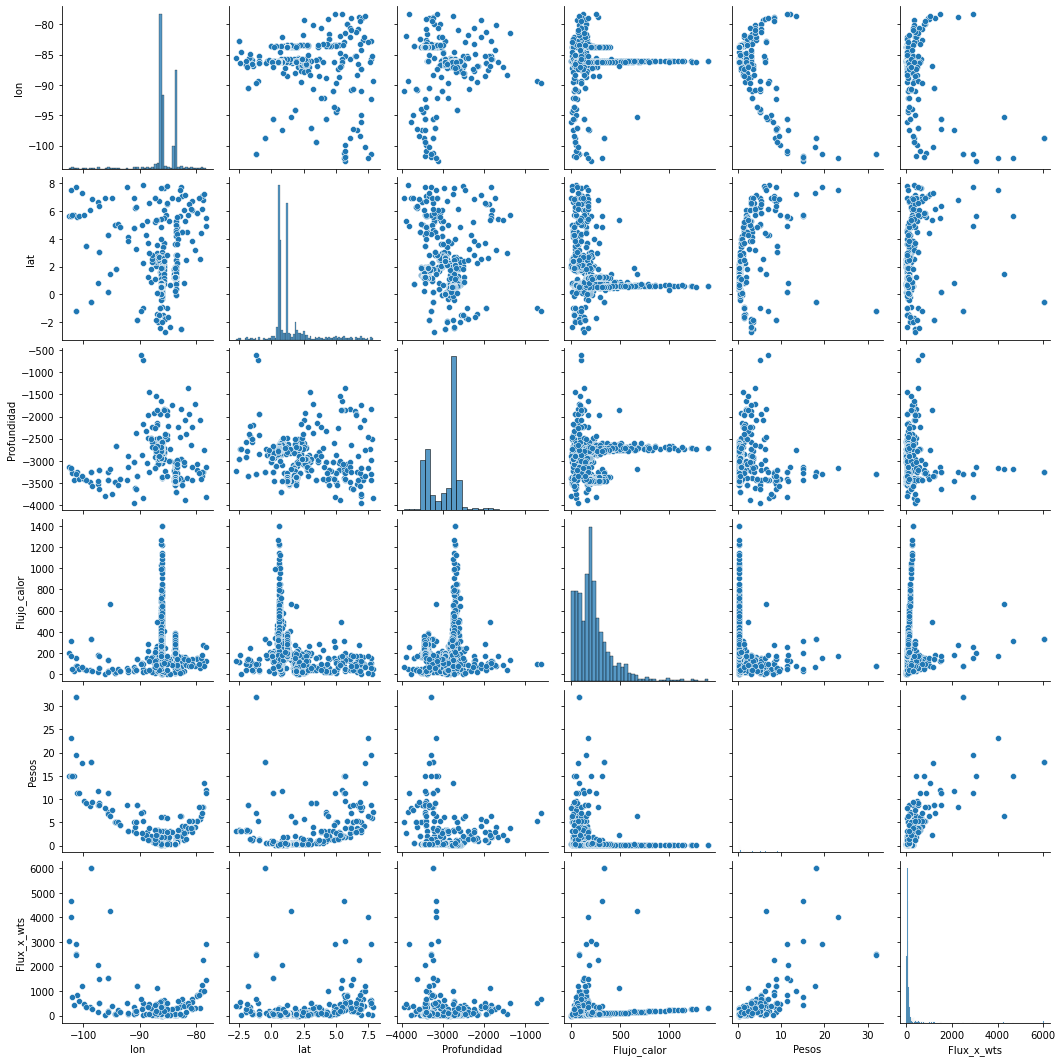

In [119]:
sns.pairplot(df_zscore_0);

In [120]:
df_Flujo_calor= df_zscore_0

In [121]:
from google.colab import files
df_Flujo_calor.to_csv('df_Flujo_calor1.csv')
files.download('df_Flujo_calor1.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

### Conclusiones 
---
1. A pesar de que se observó una correlación positiva significativa entre las variables flujo de calor y profundidad según el test de Spearman, al realizar el diagrama de dispersión entre estas variables no se observa una correlación clara y por otro lado parece estar sesgada por ciertas zonas profundas con mayor densidad de muestreo.

2. Se necesita un muestreo con una distribución más uniforme, para tener un conocimiento más detallado del flujo de calor en la Cuenca Panamá, puesto que los análisis estadísticos realizados parecen presentar cierto sesgo asociado a la densidad y distribución de muestreo.

3. Basado en los datos de flujo de calor clasificados por etapas térmicas, se puede concluir que la Cuenca Panamá presenta un comportamiento térmico correspondiente a una placa joven del Cenozoico Tardío, sin embargo, no se descarta el sesgo asociado a la distribución geográfica de los datos, los cuales se concentran en zonas cercanas a centros de expansión oceánicos donde hay una gran actividad volcánica.

4. La correlación negativa entre el flujo de calor y las coordenadas latitud y longitud puede estar asociada a la orientación de las principales características geomorfológicas del fondo oceánico; dado que los sistemas de dorsales meso-oceánicas ubicadas en la Cuenca Panamá, se encuentran localizadas cerca al ecuador geográfico con una orientación oeste-este, junto con el punto caliente de Galápagos que se encuentra a longitudes bajas y que la trinchera asociada a la zona de subducción de la placa Nazca bajo Suramérica, presenta una orientación norte-sur, es posible inferir que las muestras del flujo de calor tomadas en las cercanías de las dorsales y las islas Galápagos (latitudes y longitudes bajas), presentarán flujos de calor altos, mientras que las muestras de calor tomadas lejos de los centros de expansión y en cercanías de la zona de subducción (latitudes y longitudes altas), presentarán flujos de calor menores.

#### Referencias



Pollack, H. N., Hurter, S. J., & Johnson, J. R. (1993). Heat flow from the Earth’s interior: Analysis of the global data set. Reviews of Geophysics, 31(3), 267–280. https://doi.org/10.1029/93RG01249

# 4. Análisis de datos

### Estadística descriptiva

### Análisis estadístico
---
En esta cuarta parte realizamos un tratamiento estadístico sobre el DataFrame construido anteriormente, utilizando la estadística descriptiva para determinar las medidas de tendencia central, las medidas de variación y medidas de posición con las herramientas interactivas del módulo plotly procedimos a visualizar los datos y su comportamiento en gráficos de dispersión, scatter 3D, histogramas y boxplot. 

##### Medidas de tendencia central y medidas de posición

In [122]:
df_Flujo_calor.describe()

,lon,lat,Profundidad,Flujo_calor,Pesos,Flux_x_wts
count,1052.000000,1052.000000,1052.000000,1052.000000,1052.000000,1052.000000
mean,-85.737759,1.424610,-2957.527567,230.106321,1.008506,140.805167
std,2.857656,1.617226,389.665716,188.239471,2.704867,430.398736
min,-102.600000,-2.733317,-3955.000000,1.850000,0.209196,0.476627
25%,-86.135300,0.620539,-3391.250000,103.750000,0.209196,38.793268
50%,-86.057750,0.867978,-2775.000000,194.000000,0.257636,59.272309
75%,-83.762275,1.286233,-2714.750000,289.250000,0.312549,94.556995
max,-78.266700,7.916683,-617.000000,1398.000000,31.898402,6017.129536


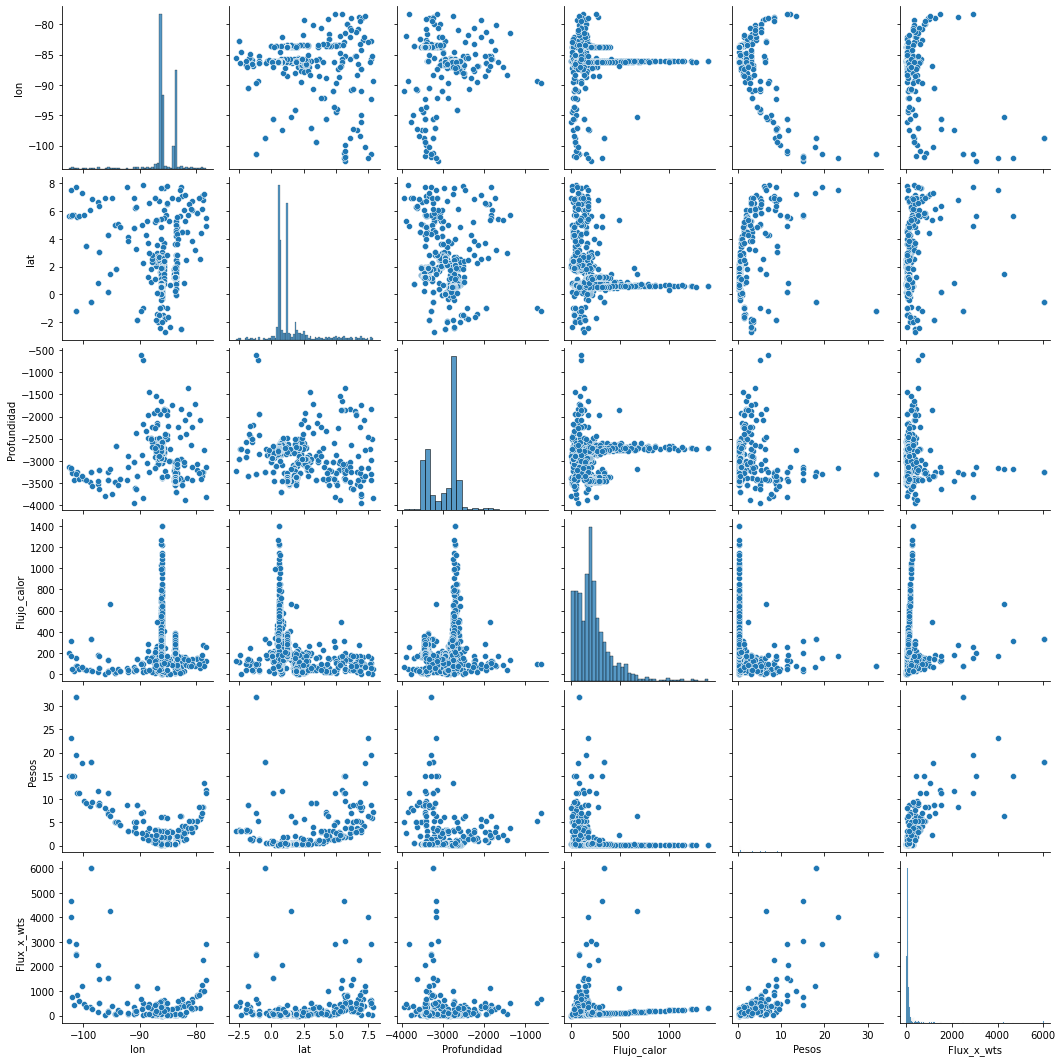

In [123]:
sns.pairplot(df_Flujo_calor);

In [124]:
px.box(df_Flujo_calor,
x = 'Flujo_calor',
orientation = 'h',
notched = True, 
points = 'all', 
title = 'Distribución de los Datos de Flujo de Calor')

In [125]:
px.box(df_Flujo_calor,
x = 'Profundidad',
orientation = 'h',
notched = True, 
points = 'all', 
title = 'Distribución de los Datos de Profundidad')

#### Valores atípicos
---
Con los diferentes diagramas ilustrados anteriormente, podemos deducir que hay ciertos puntos geográficos donde más se concentran los datos, al igual que hay un rango de valores donde más se concentran los datos de flujo de calor que es entre 10 y 600. En cuanto a la profundidad también hay una concentración de los datos entre -2500m y -3500m. Sin embargo, se observan bastantes valores atípicos **(outlier)**, los cuales se deciden no eliminar debido al criterio de los expertos.

In [126]:
fig = px.scatter(df_Flujo_calor, x="Flujo_calor", y="Profundidad", size="Flujo_calor", color="Flujo_calor", trendline='ols', marginal_x='histogram', marginal_y='histogram',)
fig.show()

In [127]:

fig = px.scatter_3d(df_Flujo_calor, x='lon', y='lat', z='Profundidad',
                    color='Flujo_calor', size='Flujo_calor', size_max=100, title='Distribución espacial de los datos de Flujo de Calor')
fig.show()

Este diagrama de dispersión nos permite observar la heterogénea distribución de los datos de flujo de calor en un espacio tridimensional.

##### Medidas de forma

###### Curtosis
---
La curtosis es una medida de forma con la que se deduce que tan cerca de la media están distribuidos los datos, a continuación se describe la clasificación:

**Leptocúrtica =** Se dice que la curtosis es leptocúrtica cuando es mayor a cero (positiva) y su gráfica es apuntada y con colas gruesas que la normal indicando que los datos tienen una distribución cercana a la media.

**Mesocúrtica =** Se dice que la curtosis es mesocúrtica cuando es igual a cero y su gráfica tiene una distribución normal a la media.

**Platicúrtica =** Se dice que la curtosis es platicúrtica cuando es menor a cero (negativa) y su gráfica es aplanada y con colas menos gruesas que la normal indicando que los datos tienen una distribución dispersa a la media.

In [128]:
df_Flujo_calor['Flujo_calor'].kurtosis()

7.39066578682311

Teniendo en cuenta que la curtosis es positiva, la curtosis es leptocúrtica y por tanto no tiene una distribución normal.

In [129]:
df_Flujo_calor['Profundidad'].kurtosis()

2.1014676866506545

Teniendo en cuenta que la curtosis es positiva, la curtosis es leptocúrtica y por tanto no tiene una distribución normal.

###### Asimetría o skewness
---
Skewness es un coeficiente de la medida de la asimetría de la distribución de la probabilidad de una variable aleatoria en referencia a su media.

**Asimetría positiva**: Si el valor de asimetría es positivo la cola de la distribución está a la derecha.

**Asimetría negativa**: Si el valor de asimetría es negativo la cola de la distribución está a la izquierda.

**Simétrica**: Si el valor de asimetría es igual a cero la distribución simétrica.

In [130]:
df_Flujo_calor['Flujo_calor'].skew()

2.1549844906376414

Este coeficiente es positivo indicando que la cola de la distribución está hacia la derecha.

In [131]:
df_Flujo_calor['Profundidad'].skew()

0.4758638367674435

Es aparentemente simétrica con una ligera distribución hacia la derecha.

In [132]:
fig = px.histogram(df_Flujo_calor, x="Profundidad", marginal="violin", title='Profundidad')
fig.show()

Sin embargo, realizando el histograma de la variable profundidad se observa que la aparente simetría se debe a que presenta una distribución bimodal.

In [133]:
fig = px.histogram(df_Flujo_calor, x="Flujo_calor", marginal="violin", title='Histograma Flujo de Calor')
fig.show()

### Estadística inferencial
---
También se realizaron las respectivas pruebas de hipótesis para comprender la relación entre los valores del flujo de calor con las demás variables. Teniendo en cuenta que los datos no presentaban una distribución normal ni varianzas iguales, se utilizaron las pruebas de hipótesis con el parámetro Spearman. 

##### Prueba de Levene

---
Se opta por la prueba de Levene como prueba de las siguientes hipótesis:

**$H_0$** Las variables **Flujo_calor** y **Profundidad** tienen varianzas iguales.

**$H_1$** Las variables **Flujo_calor** y **Profundidad** no tienen varianzas iguales.

In [134]:
statistic, pvalue= stats.levene(df_Flujo_calor['Flujo_calor'], df_Flujo_calor['Profundidad'])
pvalue= round(pvalue)
print(f'El p-valor:{pvalue} es mayor a al nivel de significancia por lo que NO RECHAZAMOS H0') if pvalue >= 0.05 else print(f'El p-valor:{pvalue} es menor a al nivel de significancia por lo que RECHAZAMOS H0')


El p-valor:0.0 es menor a al nivel de significancia por lo que RECHAZAMOS H0


Significa que las varaibles Flujo_calor y Profundidad no tiene varianzas iguales

#### Pruebas de Normalidad

Se opta por dos tipos de pruebas de normalidad para saber si los datos se comportan de manera normal o no.

**$H_0$** La variable **Flujo_calor** tiene una distribución normalizada.

**$H_1$** La variable **Flujo_calor** no tiene una distribución normalizada.

##### Prueba de normalidad Shapiro-Wilk

In [135]:
statistic, pvalue= stats.shapiro(df_Flujo_calor['Flujo_calor'])
pvalue= round(pvalue)
print(f'El p-valor:{pvalue} es mayor a al nivel de significancia por lo que NO RECHAZAMOS H0') if pvalue >= 0.05 else print(f'El p-valor:{pvalue} es menor a al nivel de significancia por lo que RECHAZAMOS H0')


El p-valor:0 es menor a al nivel de significancia por lo que RECHAZAMOS H0


Con un nivel de significacncia de $\alpha=0.05$ Se observa un p-valor menor al nivel de significancia permitiéndonos rechazar la hipótesis nula.

##### Prueba de normalidad con el gráfico Q-Q

Se aplica la prueba con el gráfico Q-Q, el cual corrobora que la distribución no es normal, ya que los datos no tienen un comportamiento lineal siguiendo una recta de tendencia.

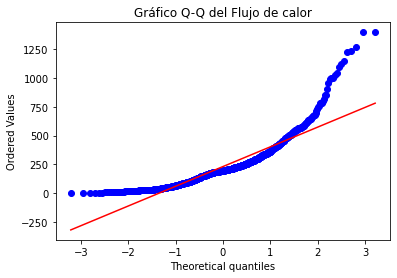

In [136]:
stats.probplot(df_Flujo_calor['Flujo_calor'], plot = plt, dist= 'norm')
plt.title('Gráfico Q-Q del Flujo de calor') 
plt.show()

Aplicamos varias pruebas de normalidad para determinar si los datos tienen distribución normal o no y así mismo decidir los tipos de **pruebas de hipótesis** que pueden ser aplicados para este caso.

### Análisis de correlación
---
Para el análisis de correlación entre las variables se usa el método de Spearman $\rho$, dado que las variables no presentan distribución normal y no presentan homogeneidad de varianzas.

In [137]:
df_corr= df_Flujo_calor.corr(method= 'spearman')
df_corr

,lon,lat,Profundidad,Flujo_calor,Pesos,Flux_x_wts
lon,1.000000,0.342153,-0.503639,0.015164,0.294003,-0.043739
lat,0.342153,1.000000,-0.411355,-0.447602,0.667497,-0.009296
Profundidad,-0.503639,-0.411355,1.000000,0.144758,-0.497840,0.021204
Flujo_calor,0.015164,-0.447602,0.144758,1.000000,-0.457232,0.532267
Pesos,0.294003,0.667497,-0.497840,-0.457232,1.000000,0.298293
Flux_x_wts,-0.043739,-0.009296,0.021204,0.532267,0.298293,1.000000


In [138]:
px.imshow(df_corr)

Los coeficientes de correlación entre las variables nos permiten observar algún grado de correlación negativa entre las variables profundidad vs latitud, profundidad vs longitud y flujo de calor vs latitud.

Y correlaciones positivas entre las variables latitud vs longitud y flujo de calor vs profundidad.

A pesar de que no se observa una correlación clara entre las variables, se procede a aplicar las pruebas de hipótesis para significancia estadística según el parámetro de Spearman para decidir si los coeficientes de correlación son significativos o no.

**$H_0$** La correlación entre las variables no es significativa.

**$H_1$** La correlación entre las variables es significativa.

In [139]:
def pvalor(x):
    cols= ['lon', 'lat', 'Profundidad', 'Flujo_calor']
    c= []
    pv= []
    for i in cols:
        coef, p = stats.spearmanr(df_Flujo_calor[x], df_Flujo_calor[i])
        c.append(coef)
        pv.append(p)
        c = [round(num0, 1) for num0 in c]
        pv= [round(num1, 1) for num1 in pv]
               
    return print(f'p-valores: {pv} \ncoeficientes de Correlación: {c} \nPara: 1. longitud, 2. latitud, 3. Profundidad y 4. Flujo de calor respectivamente')


In [140]:
pvalor('lon')

p-valores: [0.0, 0.0, 0.0, 0.6] 
coeficientes de Correlación: [1.0, 0.3, -0.5, 0.0] 
Para: 1. longitud, 2. latitud, 3. Profundidad y 4. Flujo de calor respectivamente


In [141]:
pvalor('lat')

p-valores: [0.0, 0.0, 0.0, 0.0] 
coeficientes de Correlación: [0.3, 1.0, -0.4, -0.4] 
Para: 1. longitud, 2. latitud, 3. Profundidad y 4. Flujo de calor respectivamente


In [142]:
pvalor('Profundidad')

p-valores: [0.0, 0.0, 0.0, 0.0] 
coeficientes de Correlación: [-0.5, -0.4, 1.0, 0.1] 
Para: 1. longitud, 2. latitud, 3. Profundidad y 4. Flujo de calor respectivamente


In [143]:
pvalor('Flujo_calor')

p-valores: [0.6, 0.0, 0.0, 0.0] 
coeficientes de Correlación: [0.0, -0.4, 0.1, 1.0] 
Para: 1. longitud, 2. latitud, 3. Profundidad y 4. Flujo de calor respectivamente


Dado que los p-valores para las variables latitud, longitud, profundidad son < 0.05 se puede rechazar la $H_0$ de que no hay correlación significativa, por otro lado, el p-valor para la variable flujo de calor es mayor a 0.05 respecto a la variable longitud lo que nos permite no rechazar la $H_0$ de que la correlación entre las variables no es significativa.

## Visualización interactiva de los datos y distribución geográfica
---
Se hizo una representación cartográfica de los datos para entender su distribución geográfica, permitiéndonos observar que los datos no presentan una densidad de muestreo uniforme en el área de estudio y están concentrados en lugares específicos de la Cuenca Panamá.

In [144]:
fig = px.density_mapbox(df_Flujo_calor, lat='lat', lon='lon', z='Flujo_calor', radius=20,
                        center=dict(lat=2.5, lon=-86), zoom=5)
fig.update_layout(
    mapbox_style="white-bg",
    mapbox_layers=[
        {
            "below": 'traces',
            "sourcetype": "raster",
            "sourceattribution": "United States Geological Survey",
            "source": [
                "https://basemap.nationalmap.gov/arcgis/rest/services/USGSImageryOnly/MapServer/tile/{z}/{y}/{x}"
            ]
        }
      ])
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()

In [145]:
fig = px.density_mapbox(df_Flujo_calor, lat='lat', lon='lon', z='Flujo_calor', radius=10,
                        center=dict(lat=2.5, lon=-86), zoom=4.2,
                        mapbox_style="carto-darkmatter", title='Flujo de Calor en la Cuenca Panamá')
fig.show()